In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Vysvetlenie k dátam

Projektový dataset reprezentuje fyzikálno-chemické vlastnosti červených portugalských vín "Vinho Verde" a ich výslednú kvalitu. 

###### Jednotlivé atribúty datasetu: 
1 fixed acidity - pevná kyslosť: pevné kyseliny, ktoré sú spojené s vínom (neprchavé kyseliny).

2 volatile acidity - prchavá kyslosť: množstvo kyseliny octovej vo víne, ktoré môže v príliš vysokých úrovniach viesť k nepríjemnej, octovej chuti.

3 citric acid - kyselina citrónová: môže pridať „čerstvosť“ ku chuti do vín.

4 residual sugar - zvyškový cukor: množstvo cukru zostávajúce po zastavení fermentácie (uvedené v gramoch na liter).

5 chlorides - množstvo chloridu vo víne.

6 free sulfur dioxide - voľný oxid siričitý: zabraňuje mikrobiálnemu rastu a oxidácii vína.

7 total sulfur dioxide - celkový oxid siričitý: prejavuje sa v chuti vína.

8 density - hustota.

9 pH: opisuje, ako je kyslé alebo zásadité víno na stupnici od 0 (veľmi kyslé) do 14 (veľmi zásadité). Väčšina vín sa pohybuje medzi 3 až 4 stupňami pH.

10 sulphates - síran: vínna prísada, ktorá môže prispieť k hladinám oxidu siričitého (S02), ktoré pôsobia ako antimikrobiálne a antioxidačné látky.

11 alcohol - alkohol: obsah alkoholu vo víne (v %).

12 quality - kvalita (skóre medzi 0 a 10) -  výstupná premenná (na základe senzorických údajov).

###### Cieľ práce: použite strojového učenia na predikciu výslednej kvality vína.

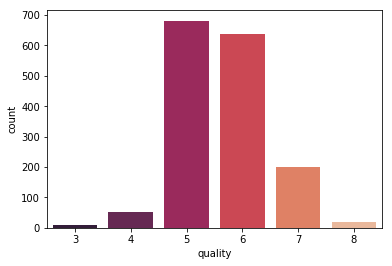

In [4]:
#rozloženie analyzovaných dát v rámci výslednej kvality vína (počet vzoriek dosahujúcich danú kvalitu)
sns.countplot(x='quality', data=data, palette="rocket")

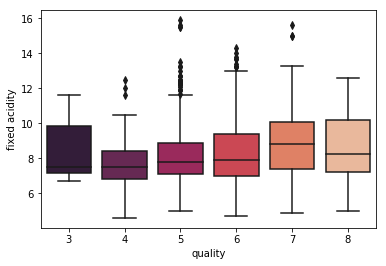

In [5]:
#vplyv jednotlivých atribútov datasetu vzhľadom na výslednú kvalitu vína
sns.boxplot('quality', 'fixed acidity', data = data, palette="rocket")

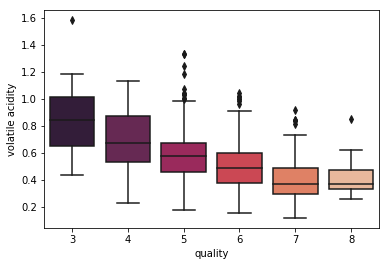

In [6]:
sns.boxplot('quality', 'volatile acidity', data = data, palette="rocket")

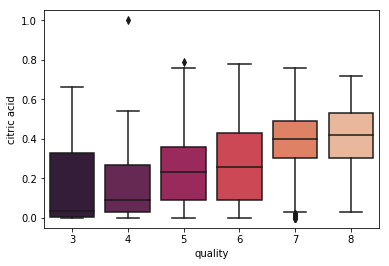

In [7]:
sns.boxplot('quality', 'citric acid', data = data, palette="rocket")

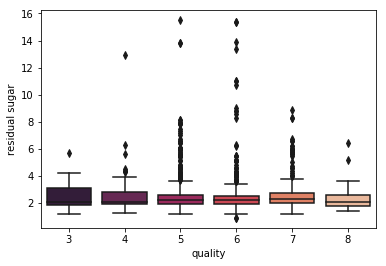

In [8]:
sns.boxplot('quality', 'residual sugar', data = data, palette="rocket")

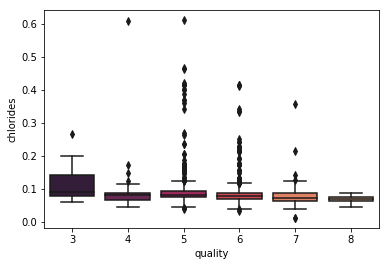

In [9]:
sns.boxplot('quality', 'chlorides', data = data, palette="rocket")

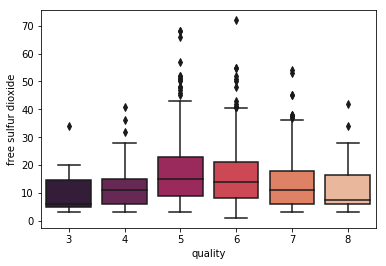

In [10]:
sns.boxplot('quality', 'free sulfur dioxide', data = data, palette="rocket")

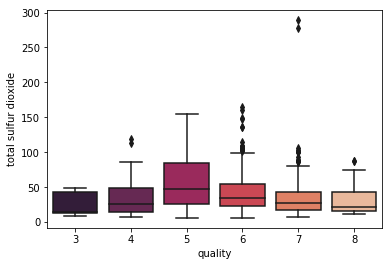

In [11]:
sns.boxplot('quality', 'total sulfur dioxide', data = data, palette="rocket")

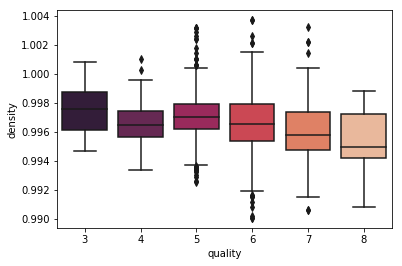

In [12]:
sns.boxplot('quality', 'density', data = data, palette="rocket")

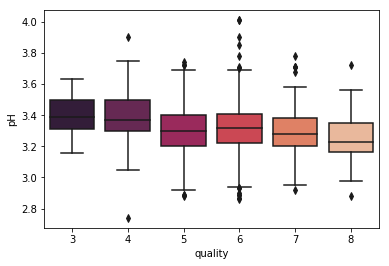

In [13]:
sns.boxplot('quality', 'pH', data = data, palette="rocket")

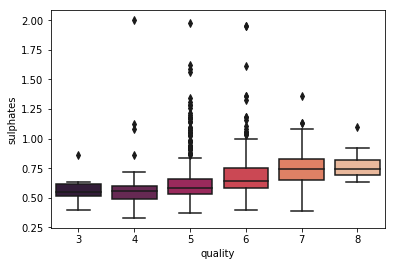

In [14]:
sns.boxplot('quality', 'sulphates', data = data, palette="rocket")

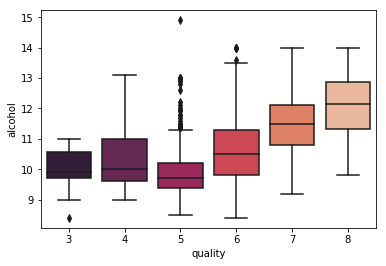

In [15]:
sns.boxplot('quality', 'alcohol', data = data, palette="rocket")

#### Analýza dát

Analýza dát použítím seaborn boxplot nám ukázala pomerne mnoho odľahlých hodnôt a taktiež vplyv atribútov ako: volatile acidity - prchavá kyslosť, citric acid -kyselina citrónová, alkohol na výslednú kvalitu vína.

Ďalším krokom pre pochopenie dát je použitie metódy describe(), ktorá nám poskytuje deskriptívnu štatistiku, ktorá sumarizuje centrálnu tendenciu, rozptyl a tvar distribúcie dátového súboru. Pre každý stĺpec (atribút) v rámci datasetu získame nasledujúce údaje: 

- Count - koľko hodnôt spadá do atribútu
- Mean - aký je priemerný priemer (Súčet hodnôt / počet hodnôt)
- STD - aká je štandardná odchýlka - toto číslo opisuje, ako široko sa skupina líši od priemeru.
- Min - najmenšia hodnota v konkrétnom atribúte
- 25% / 50% / 75% - aká hodnota predstavuje 25% / 50% / 75% údajov.
- Max - najvyššia hodnota v konkrétnom atribúte

In [16]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Z výsledkov môžeme vidieť, že naprídklad: 
- fixná kyslosť nadobúda pri 25% hodnotu 7,1 a pri 50% hodnotu 7,9. Čo nie až taký veľký rozptyl. To by mohlo vysvetliť veľké množstvo odľahlých hodnôt.
- kyselina citrónová - sa zdá byť rovnomerne rozložená
- zostatkový cukor - minimálna hodnota - 0,9, maximálna - 15, vidíme veľký rozdiel. Čo by mohlo vysvetliť extrémne (odľahlé) hodnoty.
- chloridy - podobne ako zvyškový cukor. min - 0,012, max - 0,611

### 1. Predikcia pomocou neurónovej siete využitím knižnice Keras

In [17]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
# načítanie prvých 11 atribútov do matice X
X = data.iloc[:,0:11].values
# načítanie údajov atribútu kvality vína do premennej y
y = data.iloc[:,11].values

Algoritmy strojového učenia nemôžu pracovať s kategorickými údajmi priamo.

Kategorické údaje sa musia konvertovať na čísla.

Toto platí, ak pracujeme s problémom typu klasifikácie sekvencií a plánujeme používať metódy hĺbkového učenia.

In [19]:
# Výstupy kvality v poli y sú typu int. Zmeníme ich na kategorické.
y = y.astype('object')

In [20]:
# zmena kategorických dát kvality na číselné zobrazenie využitím LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#### One hot encoding

Je reprezentácia kategorických premenných ako binárnych vektorov.

To vyžaduje, aby sa kategorické hodnoty mapovali na celočíselné hodnoty.

Potom je každá celočíselná hodnota reprezentovaná ako binárny vektor.

In [21]:
#implementácia one hot encoding na celočíselné hodnoty atribútu výslednej kvality vína
from keras.utils import np_utils
y = np_utils.to_categorical(y)

Using TensorFlow backend.


#### Rozdelenie dát na trénovacie a testovacie 

Dáta sme rozdelili do dvoch setov v pomere 75% trénovacie / 25% testovacie.

- Trénovacie dáta: slúžia v procese učenia sa modelu pre objavovanie vzorcov (patternov) v dátach.
- Testovacie dáta: používajú sa na posúdenie, ako dobre bol model naučený predikovať výsledky. V testovacej fáze nemôže model použiť školiacu dátovú množinu (testovacie dáta), kde už „pozná“ očakávaný výstup, čiže testovacie dáta nám odrážaujú reálnu predikciu modelu na neznámej množine dát.


In [22]:
#Rozdelenie dát na trénovacie a testovacie v pomere 75% trénovacie / 25% testovacie
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Škálovanie/štandardizácia dát

Nasledujúcim krokom je škálovanie/štandardizácia dát, nakoľko dataset obsahuje množinu údajov (atribútov), ktoré sa veľmi líšia 
veľkosťami, jednotkami a rozsahom. Keďže väčšina algoritmov strojového učenia používa Eucledovskú vzdialenosť medzi dvomi dátovými bodmi vo svojich výpočtoch, tento fakt by spôsoboval problém, nakoľko výsledky by sa výrazne líšili medzi rôznymi jednotkami.

Aby sme tento efekt potlačili, musíme priniesť všetky funkcie na rovnakú úroveň. To možno dosiahnuť škálovaním.

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Modely použitím knižnice Keras sú definované ako postupnosť vrstiev. Vytvárame sekvenčný model a postupne pridávame vrstvy, kým nebudeme spokojní s našou topológiou siete.

<img src="files/keras.png">

#### Definovanie modelu


Prvým krokom je zabezpečiť, aby vstupná vrstva mala správny počet vstupov. Toto je možné zadať pri vytváraní prvej vrstvy s argumentom input_dim a jej nastavením na 11 pre našich 11 vstupných premenných v rámci datasetu. V tomto príklade použijeme plne pripojenú sieťovú štruktúru s tromi vrstvami. Plne pripojené vrstvy sú definované pomocou triedy Dense. Počet neurónov vo vrstve môžeme určiť ako prvý argument, inicializačnú metódu ako druhý argument ako init a špecifikovať aktivačnú funkciu pomocou aktivačného argumentu.

V našom prípade inicializujeme sieťové váhy na malé náhodné číslo generované z rovnomerného rozloženia („uniform“), v tomto prípade medzi 0 a 0,05, pretože to je predvolená jednotná inicializácia hmotnosti v Kerase. Použili sme aktivačnú funkciu usmerňovača („relu“) na prvých dvoch vrstvách a sigmoidnú funkciu vo výstupnej vrstve. 

Prvá vrstva má 9 neurónov a očakáva 11 vstupných premenných. Druhá skrytá vrstva má 9 neurónov a výstupná vrstva 6 neurónov na predikciu výslednej kvality.

In [25]:
classifier = Sequential()

classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

#### Kompilácia modelu

Pri kompilácií sme špecifikovali stratovú funkciu (v našom prípade logaritmickú stratu, ktorá je pre problém binárnej klasifikácie definovaná v Keras ako „binary_crossentropy“), ktorá sa použije na vyhodnotenie množiny váh a optimalizátor (algoritmus gradientového zostupu „adam“), ktorý sa používa na vyhľadávanie rôznych váh pre sieť.

In [26]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Následne sme naplnili sieť trénovacími dátami, určili počet iterácií (epochs) a počet inštancií (batch_size), ktoré sa vyhodnotia pred vykonaním aktualizácie váh v sieti.

In [27]:
history = classifier.fit(X_train, y_train, batch_size = 1200, epochs = 600,verbose=0, validation_data=(X_test,y_test))

In [28]:
#presnosť predikcie modelu na testovacích dátach
scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

400/400 [==============================] - 0s 41us/step

acc: 86.17%


In [29]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


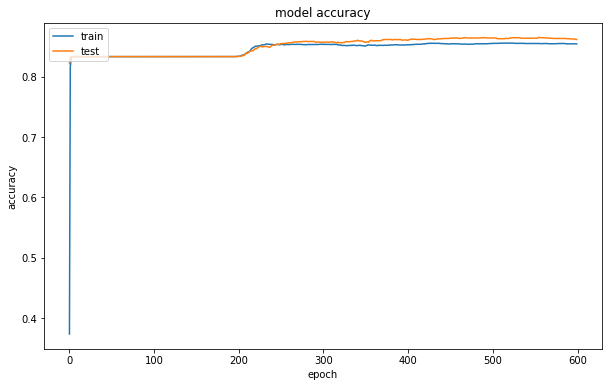

In [30]:
# graf vývoja presnosti modelu (trénovacia vs. testovacia fáza)
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

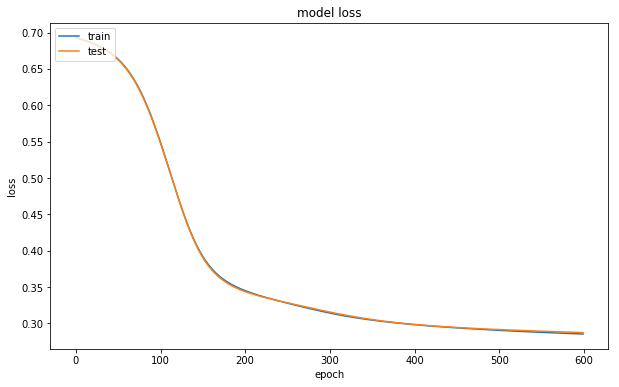

In [31]:
# graf vývoja chybovosti modelu (trénovacia vs. testovacia fáza)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# V druhom modely sme použili na prvých dvoch vrstvách aktivačnú funkciu selu a na poslednej vrstve aktivačnú funkciu softmax, 
# čo vo výsledku viedlo k o niečo vyššej percentuálnej presnosti predikcie modelu
classifier = Sequential()

classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'selu', input_dim = 11))

classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'selu'))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(X_train, y_train, batch_size = 1200, epochs = 600,verbose=0, validation_data=(X_test,y_test))

In [33]:
#presnosť predikcie modelu na testovacích dátach
scores = classifier.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

400/400 [==============================] - 0s 49us/step

acc: 87.17%


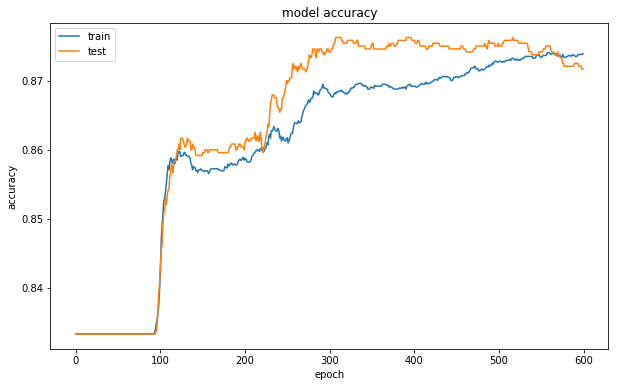

In [34]:
# graf vývoja presnosti modelu (trénovacia vs. testovacia fáza)
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

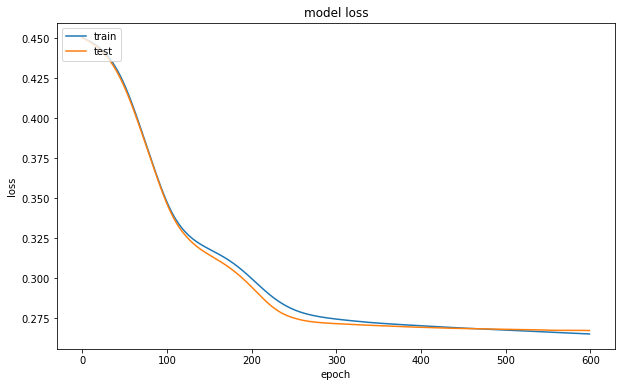

In [35]:
# graf vývoja chybovosti modelu (trénovacia vs. testovacia fáza)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()